In [132]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Data Science Problem Statement:
Employee Attrition Prediction
Your task is to predict employee attrition using a given dataset. The dataset includes various features related to employees, and the column names are self-explanatory.
Instructions:
•
Follow the Data Science Life Cycle to approach this problem.
•
Perform data preprocessing, exploratory data analysis, and feature engineering as needed.
•
Apply appropriate machine learning algorithms to predict employee attrition.
•
Fine-tune the models to achieve the best possible results.
•
Ensure that all code is uploaded to a public GitHub repository.
•
Make sure the output cells are visible in the GitHub repository.
•
Validate the GitHub link to ensure it is accessible. An invalid link will result in no marks for the assignment.

In [133]:
# Load the data set
data=pd.read_csv('/content/Employee (1).csv')

In [134]:
#Displaying the data set
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [135]:
data.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed
74497,73042,59,Female,48,Education,3774,Good,High,Below Average,1.0,...,4.0,Mid,Large,118,No,No,No,Good,Very High,Left


##Preprocessing
Preprocessing in Python refers to the preparatory steps applied to raw data before using it for analysis or modeling. These steps may include cleaning data, handling missing values, scaling or normalizing features, encoding categorical variables, and splitting data into training and testing sets. Preprocessing is crucial for ensuring data quality and compatibility with machine learning algorithms, ultimately improving the accuracy and reliability of analytical results.

In [136]:
#checking information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [137]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


checking null values

In [138]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [139]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [140]:
data.shape

(74498, 24)

In [141]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [142]:
data.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

In [143]:
data.dtypes

Employee ID                   int64
Age                           int64
Gender                       object
Years at Company              int64
Job Role                     object
Monthly Income                int64
Work-Life Balance            object
Job Satisfaction             object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home            int64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure                int64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
dtype: object

In [144]:
# dropping the columns with no impact
data.drop(['Employee ID'],axis=1,inplace=True)

In [145]:
data

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,Yes,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,30,Female,15,Education,3856,Good,Medium,Average,2.0,Yes,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,No,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,18,Male,4,Education,5276,Fair,High,Average,0.0,No,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


Filling the null values numerical column using mean and categoricalcolumn using mode

In [146]:
#Filling the null values of numerical columns using mean
data['Number of Promotions' ]= data['Number of Promotions' ].fillna(data['Number of Promotions' ].mean())

In [147]:
data['Number of Dependents']= data['Number of Dependents'].fillna(data['Number of Dependents'].mean())

In [148]:
#Filling null values of categorical column with mode
categorical_columns = ['Work-Life Balance', 'Performance Rating', 'Education Level', 'Marital Status',
                       'Job Level','Company Size', 'Remote Work', 'Employee Recognition']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [149]:
#checking if any null values present or not
data.isna().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

All null values is filled

##EDA

In [150]:
# Encoding categorical target variable
from sklearn.preprocessing import LabelEncoder

In [151]:
le=LabelEncoder()

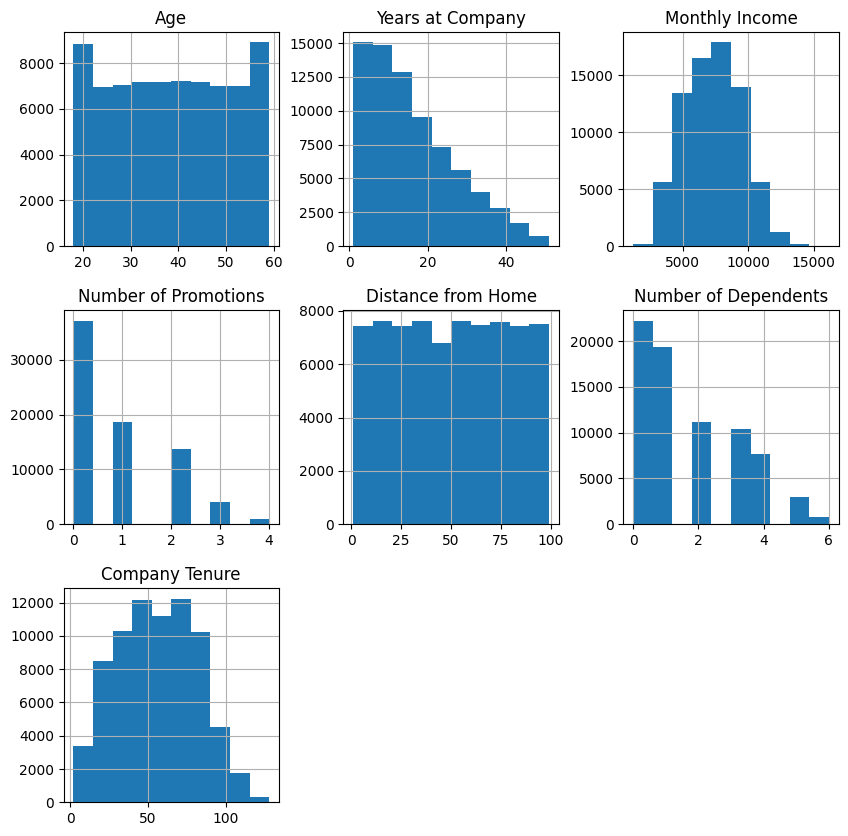

In [152]:
#PLOTTING HISTOGRAM
data.hist(figsize=(10,10))
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

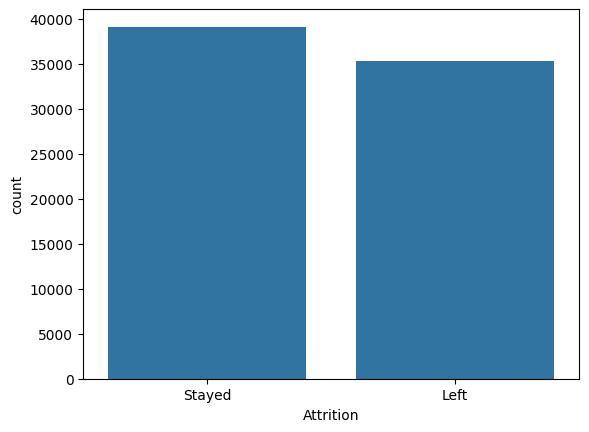

In [153]:
sns.countplot(x='Attrition',data=data)

In [154]:
numerical_columns = ['Number of Promotions', 'Number of Dependents']

<function matplotlib.pyplot.show(close=None, block=None)>

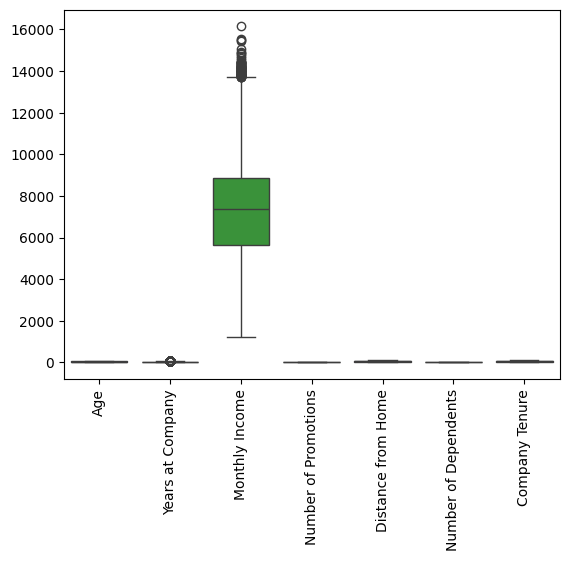

In [155]:
#Boxplot to find outliers
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show

monthly income is having more number of outlier values

In [156]:
categorical_column = ['Gender','Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
        'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition']

In [157]:
# Encoding categorical target variable
from sklearn.preprocessing import LabelEncoder

In [158]:
le=LabelEncoder()

In [159]:
df=pd.DataFrame()

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [162]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1


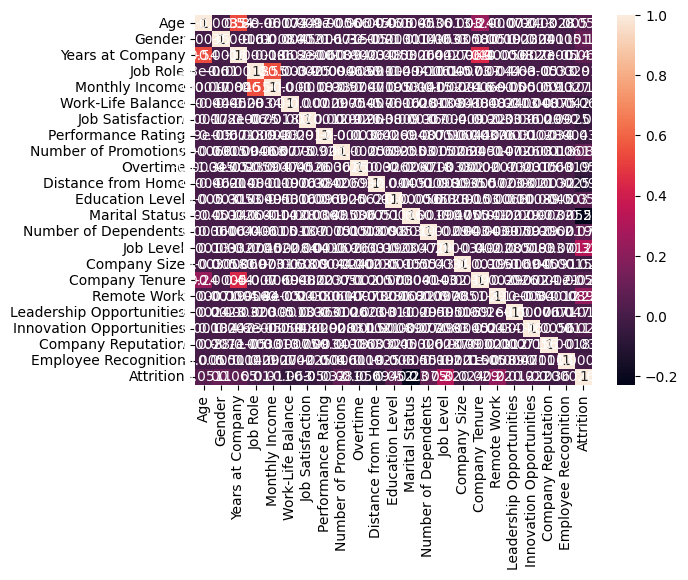

<Figure size 2000x2500 with 0 Axes>

In [163]:

sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(20,25))
plt.show()

#Modelling

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [169]:
#Splitting the dataset into features (X) and target (y)
x=data.drop('Attrition',axis=1)
y=data.Attrition
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [170]:
x_train

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
8409,23,1,9,2,8960,0,2,2,0.0,0,...,2,0.0,0,1,74,0,0,0,0,1
64755,58,0,21,3,6084,1,2,1,1.0,1,...,2,0.0,0,1,36,0,0,0,2,2
30256,34,1,17,0,3850,2,3,0,3.0,0,...,1,4.0,0,2,75,0,0,0,2,3
65790,57,0,29,2,9208,1,3,1,1.0,1,...,2,1.0,0,0,51,1,0,1,0,2
65025,30,0,10,3,5983,0,2,0,2.0,0,...,2,0.0,2,0,23,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,32,1,13,2,8809,1,2,0,2.0,0,...,2,4.0,1,1,26,0,0,0,2,2
6265,45,0,16,4,9907,2,0,0,0.0,0,...,2,1.0,0,2,79,1,0,0,3,2
54886,28,1,3,3,5238,0,0,3,0.0,0,...,1,1.0,1,1,5,0,0,0,2,0
860,39,1,2,1,4814,2,2,0,2.0,0,...,2,2.0,1,1,74,0,1,0,2,1


In [171]:
y_train

8409     0
64755    0
30256    1
65790    0
65025    1
        ..
37194    1
6265     0
54886    0
860      0
15795    0
Name: Attrition, Length: 59598, dtype: int64

In [172]:
x_test

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
52684,37,0,27,4,12617,1,0,0,1.0,1,...,1,2.0,0,2,57,1,0,0,0,0
30584,35,1,12,0,5935,3,0,0,2.0,0,...,2,1.0,2,1,19,0,0,0,3,0
54655,52,1,34,0,3908,3,3,0,1.0,0,...,1,2.0,1,1,63,0,1,0,3,2
33441,35,1,21,2,5663,2,2,0,0.0,1,...,0,2.0,2,1,70,0,0,0,1,2
15666,30,1,4,2,8184,1,0,2,4.0,0,...,1,3.0,1,2,50,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16242,39,0,30,0,5082,2,0,0,1.0,0,...,1,1.0,1,0,42,0,0,0,2,1
47174,18,0,2,4,10358,1,0,0,0.0,0,...,2,0.0,0,1,54,0,0,0,2,1
12408,30,1,1,3,6051,2,0,0,1.0,0,...,1,2.0,0,1,52,0,0,1,0,0
9553,44,1,13,1,7853,0,0,3,1.0,0,...,2,1.0,2,0,53,1,0,1,1,1


In [173]:
y_test

52684    0
30584    0
54655    0
33441    1
15666    1
        ..
16242    1
47174    0
12408    0
9553     1
73041    1
Name: Attrition, Length: 14900, dtype: int64

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [177]:
y_pred=regressor.predict(x_test)
y_pred[:10]

array([0.56, 0.41, 0.4 , 0.98, 0.86, 0.61, 0.79, 0.45, 0.45, 0.19])

In [179]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

0.3374436241610738

In [180]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

0.1682646375838926

In [181]:
#check the training accuracy
regressor.score(x_test,y_test)

0.32541834936930014

In [183]:
from sklearn.metrics import mean_squared_log_error
mle=mean_squared_log_error(y_test,y_pred)

In [184]:
#check the training accuracy
regressor.score(x_train,y_train)

0.9027065962019947

In [185]:
regressor.score(x_test,y_test)>regressor.score(x_train,y_train)

False

knn

In [ ]:

metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')
plt.show()

In [ ]:

knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('Accuracy of KNN Classifier is', round(accuracy_score(y_test,knn_pred)*100,2))

svm

In [ ]:

svm=SVC(class_weight='balanced')
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Accuracy of SVM Classifier is', round(accuracy_score(y_test,svm_pred)*100,2))